In [2]:
!pip install fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 M

In [3]:
from fastbook import*

In [4]:
urls = search_images_ddg('bird photos', max_images=1)
len(urls), urls[0]

(1,
 'https://images.pexels.com/photos/110812/pexels-photo-110812.jpeg?cs=srgb&dl=birds-macro-branch-110812.jpg&fm=jpg')

In [7]:
dest = Path('/content/birds-macro-branch-110812.jpg')


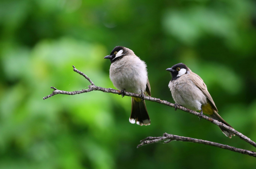

In [8]:
im = Image.open(dest)
im.to_thumb(256,256)

In [9]:
searches = 'forest', 'bird'

In [10]:
path = Path('bird_or_not')

if not path.exists():
  for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    results = search_images_ddg(f'{o} photo')
    download_images(dest, urls=results[:200])
    resize_images(dest, max_size=500, dest=dest)

In [11]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#9) [None,None,None,None,None,None,None,None,None]

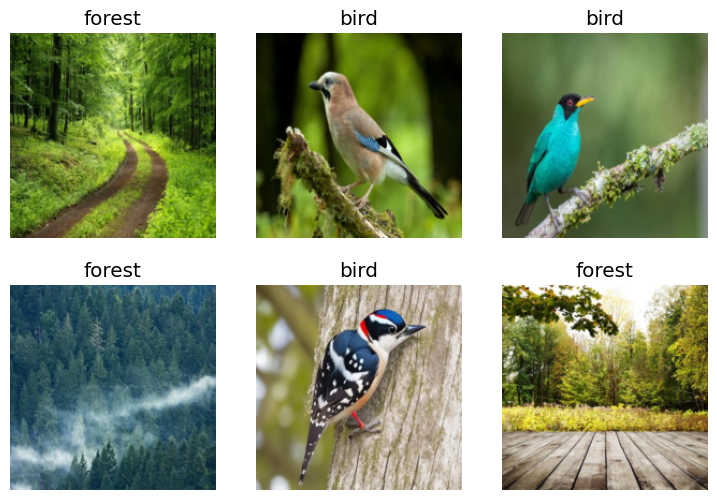

In [13]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    item_tfms=[Resize(192 ,method = 'squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [14]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 113MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.033111,0.137679,0.054795,01:36


epoch,train_loss,valid_loss,error_rate,time
0,0.094714,0.008368,0.000000,02:08
1,0.047275,0.000392,0.000000,01:59
2,0.031612,0.000096,0.000000,01:56


In [29]:
is_bird,_,probs = learn.predict(PILImage.create('jun.jpg'))
print(f'Is this a bird or forset?: \n{is_bird}')
print(f"Probability: {probs[1].item():4f}")

Is this a bird or forset?: 
forest
Probability: 0.999986
